In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)

SST_df = pd.read_csv('SST_concat.csv')

In [ ]:
zero_RT_df = SST_df[SST_df['Go.RT'] == 0]
rt_zero = len(SST_df[SST_df['Go.RT'] == 0])

In [ ]:
zero_RT_df.to_csv('weird_0s.csv')

In [ ]:
#ssddur is how long the go stimuli was present 

stop_df = SST_df[(SST_df['TrialCode'] == 'IncorrectStop') | (SST_df['TrialCode'] == 'CorrectStop')] \
[['SSD.RT', 'StopSignal.RT', 'SSDDur', 'StopSignal.Duration', 'TrialCode', 'Fix.RESP', 'Fix.RT']] #pick out all the stop trials 
                                                                                                    
                                                                                                                                                                                  

the duration of the stop signal varies


In [ ]:
stop_df['StopSignal.Duration'].value_counts() 

In [ ]:
# stop_values, stop_base = np.histogram(stop_, bins=500)
# stop_cumulative = np.cumsum(stop_values)

odd things here - some of these have rts of 0 

In [ ]:
SST_df[['Jitter', 'Fix.Duration']]

In [ ]:
for i in ['Go.OnsetTime', 'SSD.OnsetTime', 'StopSignal.OnsetTime', 'Fix.OnsetTime', 'Jitter', 'Fix.Duration']: 
    #SST_df['Go.OnsetTime'] = SST_df['Go.OnsetTime'] / 1000 
    SST_df[i] = SST_df[i] / 1000

In [ ]:
SST_df[SST_df['TrialCode'] == 'IncorrectStop' ][['TrialCode', 'SSD.RT', 'SSD.OnsetTime', \
                                                 'StopSignal.RT', 'StopSignal.OnsetTime', 'Fix.RT', 'Fix.OnsetTime', 'Jitter']].iloc[700:900]

# SST_df[['TrialCode', 'SSD.RT', 'SSD.OnsetTime', 'StopSignal.RT', \
#         'StopSignal.OnsetTime', 'Fix.RT', 'Fix.OnsetTime']].iloc[700:900]

In [ ]:
go_rts = SST_df['Go.RT'].dropna()
go_values, go_base = np.histogram(go_rts, bins=500)
go_cumulative = np.cumsum(go_values)
plt.plot(go_base[:-1], go_cumulative, c='m', label = '5000')
#plt.plot(stop_base[:-1], stop_cumulative, c='m', label = '5000')

plt.text (x=0,  y=7000, s = len(SST_df[SST_df['Go.RT'] == 0]))
plt.ylim(ymax = sum(go_values), ymin=0)

plt.ylabel('number of occurances')
plt.xlabel('reaction time on "go" trials')
plt.title('SST RT cummulative distribution')
ax = plt.gca()  # returns the current axes
ax = ax.twinx() # create twin xaxis
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax = 1))
plt.show()


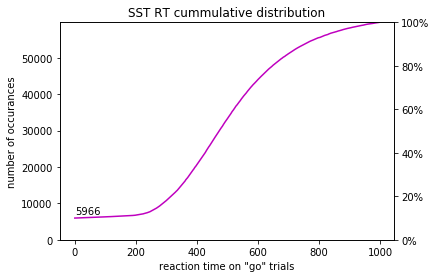

In [16]:
go_rts = SST_df['Go.RT'].dropna()
go_values, go_base = np.histogram(go_rts, bins=500)
go_cumulative = np.cumsum(go_values)
plt.plot(go_base[:-1], go_cumulative, c='m', label = '5000')
#plt.plot(stop_base[:-1], stop_cumulative, c='m', label = '5000')

plt.text (x=0,  y=7000, s = len(SST_df[SST_df['Go.RT'] == 0]))
plt.ylim(ymax = sum(go_values), ymin=0)

plt.ylabel('number of occurances')
plt.xlabel('reaction time on "go" trials')
plt.title('SST RT cummulative distribution')
ax = plt.gca()  # returns the current axes
ax = ax.twinx() # create twin xaxis
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax = 1))
plt.show()


In [ ]:
SST_df['TrialCode'].value_counts()

In [ ]:
print(f'there are {rt_zero} number of "go" trials with an RT of zero')

print(f'there are {len(zero_RT_df[zero_RT_df["TrialCode"] == "CorrectGo"])} \
number of "go" trials with no response that are recorded as correct') 

In [ ]:
print(f"empty fixation responses: {sum(np.isnan(SST_df[(SST_df['Go.RT'] == 0) & (SST_df['TrialCode'] == 'CorrectGo')]['Fix.RESP']))}") 

In [ ]:
#this shows that the responses recorded by Fix.RESP are used to calculate 'TrialCode'
sum(SST_df[(SST_df['Go.RT'] == 0) & (SST_df['TrialCode'] == 'CorrectGo')]['Fix.RESP'] #index fix.resp in this subset 
    != SST_df[(SST_df['Go.RT'] == 0) & (SST_df['TrialCode'] == 'CorrectGo')]['Go.CRESP'])   #index go.cresp in the same subset and compare 

In [ ]:
print(f"so that leaves {sum((SST_df['Go.RT'] == 0) & ~(SST_df['TrialCode'] == 'CorrectGo'))} go responses with an RT of zero with no answer")

In [ ]:
SST_df[SST_df['TrialCode'] == 'CorrectStop']['StopSignal.RT'].unique() # no rogue answers

In [ ]:
SST_df[SST_df['StopSignal.RT'] != SST_df['SSD.RT']][['StopSignal.RT', 'SSD.RT']]

In [ ]:
stop_rts = SST_df[SST_df['StopSignal.RT'] != 0]['StopSignal.RT'].dropna()
print(len(stop_rts))
print(len(SST_df[SST_df['TrialCode'] == 'IncorrectStop']))

In [ ]:
SST_df[(SST_df['TrialCode'] == 'IncorrectStop')]['StopSignal.RT'] #incorrect stop -> stop failure

In [ ]:
#SST_df[~np.isnan(SST_df['SSD.ACC'])][['SSDDur', 'Fix.RESP']]
sum(~np.isnan(SST_df['SSD.ACC']) == ~np.isnan(SST_df['StopSignal.ACC']))

In [ ]:
SST_df['StopSignal.Duration'].value_counts() #this seems ... weird - is this an eprime error? 

In [ ]:
SST_df[SST_df['Go.RT'] == 0]['TrialCode'].value_counts()

In [ ]:
SST_df[SST_df['Go.RT'] == 0][['SSD.RESP', 'StopSignal.RESP']]

In [ ]:
SST_df['SSD.RT']